# Importing Libraries

In [6]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor


import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error


# Importing Dataset

In [9]:
dataframe = pd.read_csv("fireforests.csv")



# Encode Data
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)


In [10]:
print("Head:", dataframe.head())
print("Statistical Description:", dataframe.describe())


Head:    month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthdec  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   monthoct  monthsep  
0         0         0  
1         1         0  
2 

In [11]:
print("Shape:", dataframe.shape)

Shape: (517, 30)


In [12]:
print("Data Types:", dataframe.dtypes)

Data Types: month         int64
day           int64
FFMC        float64
DMC         float64
DC          float64
ISI         float64
temp        float64
RH            int64
wind        float64
rain        float64
area        float64
dayfri        int64
daymon        int64
daysat        int64
daysun        int64
daythu        int64
daytue        int64
daywed        int64
monthapr      int64
monthaug      int64
monthdec      int64
monthfeb      int64
monthjan      int64
monthjul      int64
monthjun      int64
monthmar      int64
monthmay      int64
monthnov      int64
monthoct      int64
monthsep      int64
dtype: object


In [13]:
print("Correlation:", dataframe.corr(method='pearson'))


Correlation:              month       day      FFMC       DMC        DC       ISI  \
month     1.000000 -0.050837  0.291477  0.466645  0.868698  0.186597   
day      -0.050837  1.000000 -0.041068  0.062870  0.000105  0.032909   
FFMC      0.291477 -0.041068  1.000000  0.382619  0.330512  0.531805   
DMC       0.466645  0.062870  0.382619  1.000000  0.682192  0.305128   
DC        0.868698  0.000105  0.330512  0.682192  1.000000  0.229154   
ISI       0.186597  0.032909  0.531805  0.305128  0.229154  1.000000   
temp      0.368842  0.052190  0.431532  0.469594  0.496208  0.394287   
RH       -0.095280  0.092151 -0.300995  0.073795 -0.039192 -0.132517   
wind     -0.086368  0.032478 -0.028485 -0.105342 -0.203466  0.106826   
rain      0.013438 -0.048340  0.056702  0.074790  0.035861  0.067668   
area      0.056496  0.023226  0.040122  0.072994  0.049383  0.008258   
dayfri   -0.028562  0.158676  0.019306 -0.012010 -0.004220  0.046695   
daymon   -0.002941 -0.643220 -0.059396 -0.107921 -0

In [14]:
dataset = dataframe.values


X = dataset[:,0:12]
Y = dataset[:,12]


In [15]:
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [False  True False False False False False False False False  True  True]
Feature Ranking:  [10  1  8  9  7  6  5  4  3  2  1  1]


(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <BarContainer object of 10 artists>)

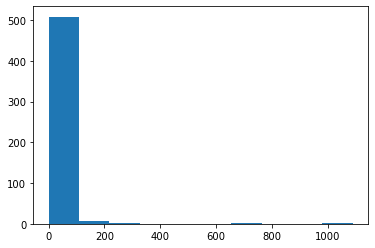

In [16]:
plt.hist((dataframe.area))


array([[<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>],
       [<AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'dayfri'}>,
        <AxesSubplot:title={'center':'daymon'}>,
        <AxesSubplot:title={'center':'daysat'}>,
        <AxesSubplot:title={'center':'daysun'}>],
       [<AxesSubplot:title={'center':'daythu'}>,
        <AxesSubplot:title={'center':'daytue'}>,
        <AxesSubplot:title={'center':'daywed'}>,
        <AxesSubplot:title={'center':'monthapr'}>,
        <AxesSubplot:title={'center':'monthaug'}>],
       [<AxesSubplot:title={'center':'mo

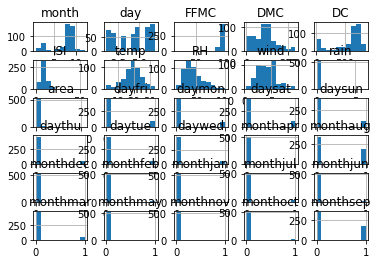

In [17]:
dataframe.hist()

In [18]:
dataframe.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)


ValueError: Layout of 4x4 must be larger than required size 30

<Figure size 432x288 with 0 Axes>

In [ ]:
dataframe.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)


In [19]:
scatter_matrix(dataframe)


NameError: name 'scatter_matrix' is not defined

ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of ticklabels (30).

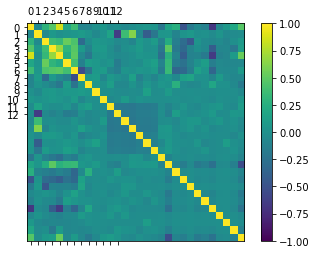

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe.columns)
ax.set_yticklabels(dataframe.columns)


In [21]:
num_instances = len(X)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(X, Y)
    
    predictions = model.predict(X)
    
    # Evaluate the model
    score = explained_variance_score(Y, predictions)
    mae = mean_absolute_error(predictions, Y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)


LiR: 0.447533 (0.201420)
Ridge: 0.447531 (0.201400)
Lasso: 0.009655 (0.243617)
ElasticNet: 0.011149 (0.243027)
Bag_Re: 1.000000 (0.000000)
RandomForest: 1.000000 (0.000000)
ExtraTreesRegressor: 1.000000 (0.000000)
KNN: 0.389358 (0.148549)
CART: 1.000000 (0.000000)
SVM: 0.007164 (0.213090)


In [22]:
Y = numpy.array(Y).reshape((len(Y), 1))
#Y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(Y)


In [23]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=12, kernel_initializer='uniform', activation='relu'))
    #model.add(Dropout(0.2))
    #model.add(Dense(5, kernel_initializer='uniform', activation='relu', kernel_constraint=maxnorm(3)))
    #model.add(Dropout(0.2))
    model.add(Dense(3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='relu'))
    
    # compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=600, batch_size=5, verbose=0)

kfold = KFold(n_splits=30, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))


NameError: name 'KerasRegressor' is not defined